In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import unicodedata
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
plt.style.use('fivethirtyeight')


In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df = pd.read_csv('/content/drive/My Drive/weather_data/brazil_weather_dataset/data.csv', delimiter=';', encoding = "ISO-8859-1", nrows = nRowsRead)
df.dataframeName = 'data.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
df.head()

There are 612 rows and 7 columns


,REGIAO,UF,ESTACAO,CODIGO,LATITUDE,LONGITUDE,ALTITUDE
0,N,PA,SANTA MARIA DAS BARREIRAS,A256,-8.729722,-49.856389,165.00
1,SE,SP,CRIOSFERA,C891,-84.000000,-79.494167,1285.00
2,CO,DF,BRASILIA,A001,-15.789444,-47.925833,1159.54
3,NE,BA,SALVADOR,A401,-13.016667,-38.516667,51.41
4,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25


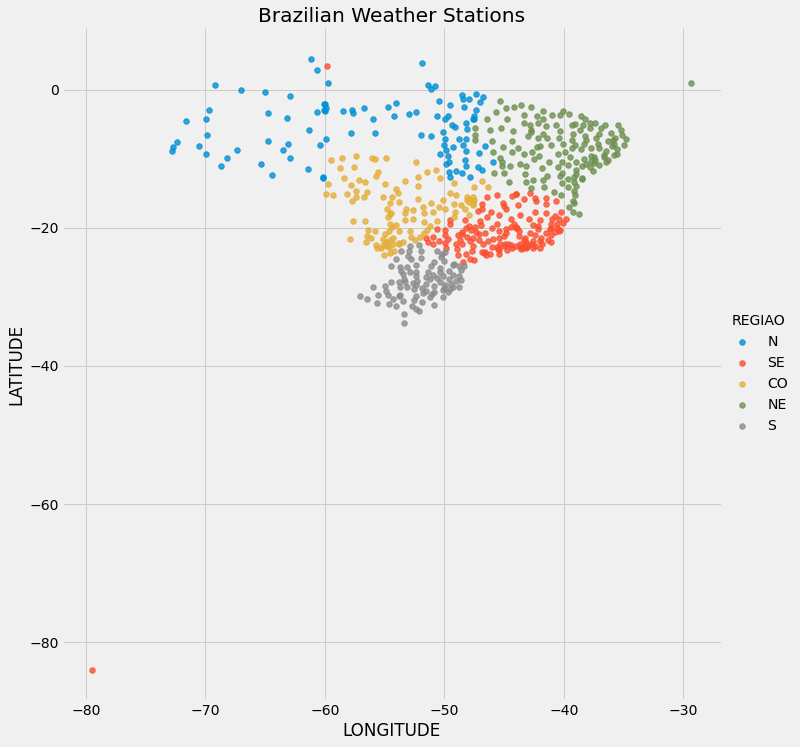

In [ ]:
g = sns.lmplot(x="LONGITUDE", y="LATITUDE", data=df,
           fit_reg=False, scatter_kws={"s": 30}, hue='REGIAO', height=10)
plt.title('Brazilian Weather Stations')
plt.show()

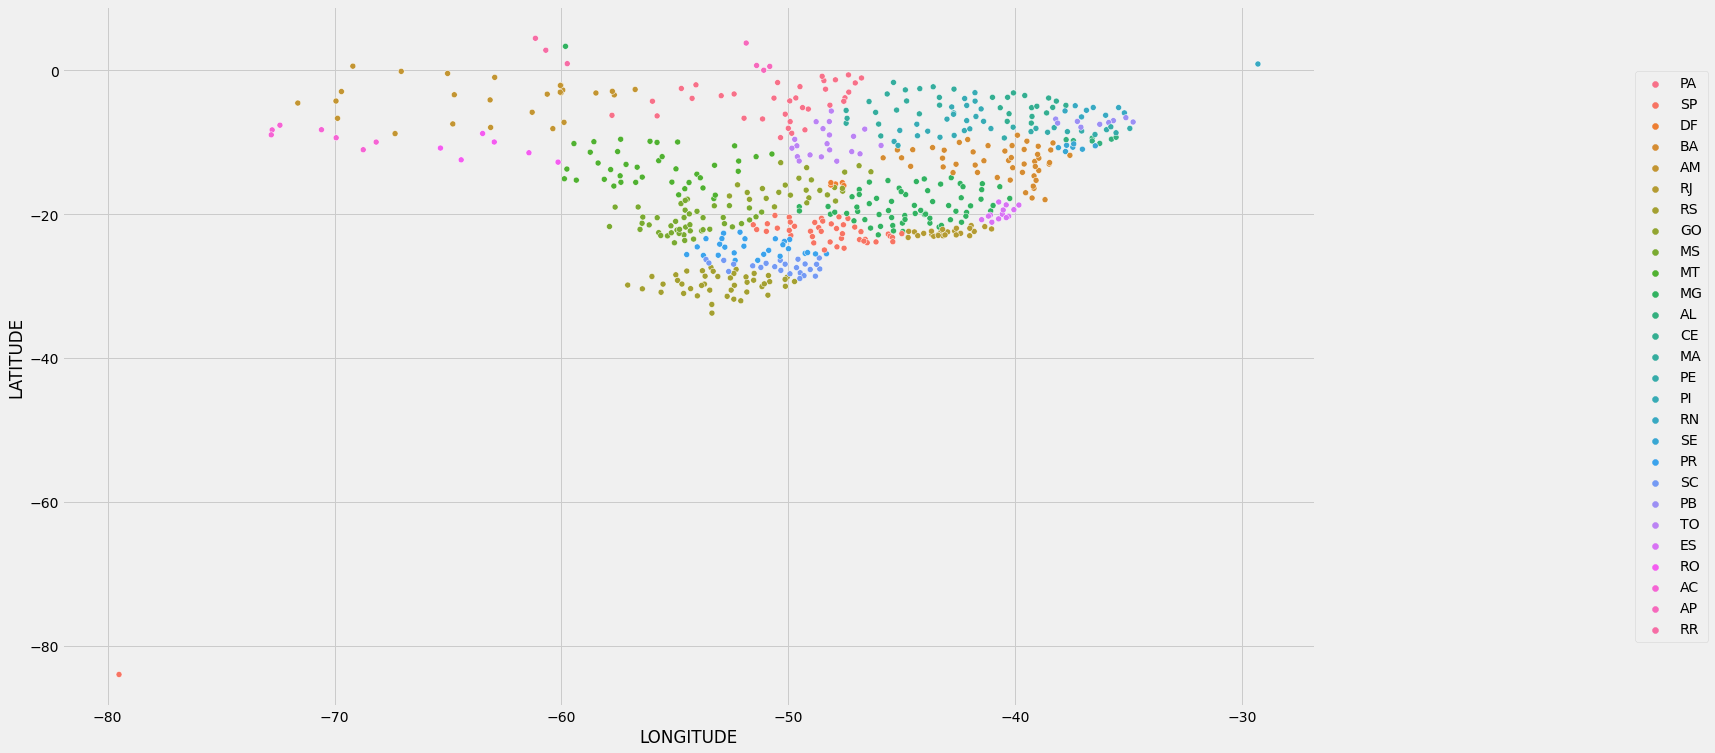

In [ ]:
plt.figure(figsize=(20,12))
g = sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=df, hue='UF')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);

In [ ]:
fig_px = px.scatter_mapbox(df, lat="LATITUDE", lon="LONGITUDE",
                           hover_name="REGIAO",
                           zoom=11, height=300)
fig_px.update_layout(mapbox_style="open-street-map",
                     margin={"r":0,"t":0,"l":0,"b":0})

fig_px.show()

In [ ]:
fig_px.update_traces(marker={"size": [10 for x in df]})

In [ ]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set2')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



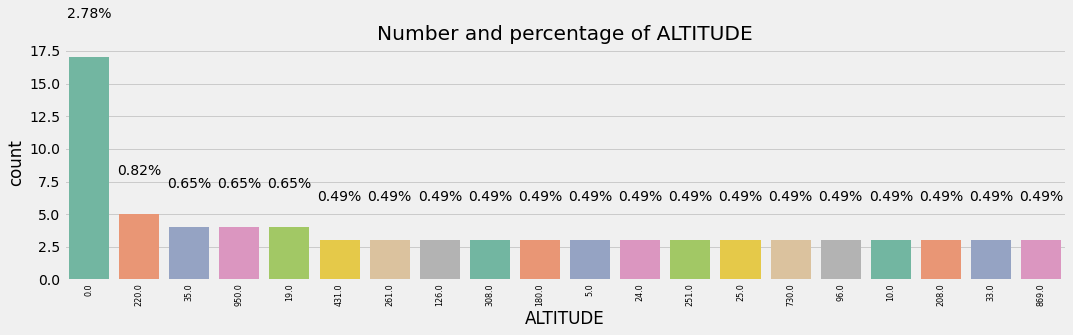

In [ ]:
plot_count("ALTITUDE", "ALTITUDE", df,4)

In [ ]:
fig = px.pie(df, values=df['ALTITUDE'], names=df['UF'],
             title='Brazilian Weather Stations',
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
df.head()

,REGIAO,UF,ESTACAO,CODIGO,LATITUDE,LONGITUDE,ALTITUDE
0,N,PA,SANTA MARIA DAS BARREIRAS,A256,-8.729722,-49.856389,165.00
1,SE,SP,CRIOSFERA,C891,-84.000000,-79.494167,1285.00
2,CO,DF,BRASILIA,A001,-15.789444,-47.925833,1159.54
3,NE,BA,SALVADOR,A401,-13.016667,-38.516667,51.41
4,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
